<h2 align="center"><u>Atliq Hotel Data Analysis Project<u>

In [1]:
# 1. import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Load, Explore, and Clean**

In [2]:
# 2. read data's
df_bookings=pd.read_csv("fact_bookings.csv")
df_date=pd.read_csv("dim_date.csv")
df_hotels=pd.read_csv("dim_hotels.csv")
df_rooms=pd.read_csv("dim_rooms.csv")

#3. load booking data
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


1: There are two different date format: 3/5/2022, 29-05-22. in 3/5/2022.
2. There are NaN value in rating column
3. no_guests are negative

In [3]:
#4. check number of rows and columns
df_bookings.shape

(134590, 12)

In [4]:
#5. check info
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


1. booking_date,check_in_date,check_out_date are in object format.
2. property id could be object
3. ratings_given and no_guests column has missing entries

In [5]:
#6. check number of missing values
#Are there missing values? How many?
df_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

1. only ratings_given has missing value. However, in practical, not all people give rating after staying in hotels. So, I will do nothing in this specific case. 2. no_guest column has 3 NaN values, it is an error. I can delete those 3 rows.

In [6]:
#7. check whether booking_id has any duplicate issues
num_duplicates = df_bookings.duplicated().sum()
print(num_duplicates)

0


In [7]:
#8. check quick statistics
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


in no_guests min value is -17. An Error!

In [8]:
#9. which rows are negative?
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [9]:
#10. how many rows are negative?
df_bookings[df_bookings.no_guests<=0].shape

(9, 12)

In [10]:
#11. delete NaN values from no_guests column,
df_bookings.dropna(subset=['no_guests'],inplace=True)
df_bookings.shape

(134587, 12)

In [11]:
#12. convert those negative values to positive in no_guest column
df_bookings['no_guests'] = df_bookings['no_guests'].abs()
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [12]:
#13. Standardize date formats
df_bookings['check_in_date'] = df_bookings['check_in_date'].str.replace('/', '-', regex=False)
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], format='mixed', dayfirst=True)

In [13]:
#14. verification
df_bookings.sample(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
15038,May102218558RT213,18558,8/5/2022,2022-05-10,15-05-22,1.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
66679,Jun142219562RT29,19562,10/6/2022,2022-06-14,16-06-22,3.0,RT2,direct online,NaN,No Show,14850,14850
24456,May162219558RT32,19558,13-05-22,2022-05-16,20-05-22,2.0,RT3,makeyourtrip,NaN,Checked Out,18000,18000
125674,Jul252216560RT31,16560,24-07-22,2022-07-25,27-07-22,1.0,RT3,logtrip,NaN,Cancelled,16800,6720
104699,Jul102217562RT18,17562,4/7/2022,2022-07-10,13-07-22,2.0,RT1,others,2.0,Checked Out,11050,11050
117400,Jul182219558RT27,19558,24-06-22,2022-07-18,21-07-22,2.0,RT2,others,1.0,Checked Out,13500,13500
123481,Jul232219558RT116,19558,21-07-22,2022-07-23,28-07-22,4.0,RT1,direct offline,NaN,Cancelled,11700,4680
90307,Jul012218559RT217,18559,26-06-22,2022-07-01,4/7/2022,1.0,RT2,others,4.0,Checked Out,9000,9000
15680,May102219563RT115,19563,10/5/2022,2022-05-10,11/5/2022,1.0,RT1,others,1.0,Checked Out,9750,9750
102765,Jul092217563RT212,17563,3/7/2022,2022-07-09,10/7/2022,1.0,RT2,direct online,5.0,Checked Out,15300,15300


**check outliers in revenue_generated column**

In [14]:
#15. check min and max value of revenue_generated column
print(df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max())

6500 28560000


Max value could be an outlier

In [15]:
#16. print mean and std 
print(df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std())

15378.041155535082 93037.07480567251


In [16]:
#17. I will use mean+3STD method
limit=15378.036937686695+(3*93040.1549314641)
print(limit)

294498.50173207896


In [17]:
#18. check rows that are greater than upper_bound?
df_bookings[df_bookings.revenue_generated>limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,2022-05-01,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,2022-05-01,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,2022-05-01,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,2022-07-28,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


by comparing the revenue_realized column, I can understand that the values are unrealistic, it can lead some error. I will remove these data

In [18]:
#19. remove outliers
df_bookings=df_bookings[df_bookings.revenue_generated<=limit]

In [19]:
#20. check shape
df_bookings.shape

(134582, 12)

**check outliers in revenue_realized column**

In [20]:
#21. check quick statistics of revenue_realized column
df_bookings.revenue_realized.describe()

count    134582.000000
mean      12696.022269
std        6928.108433
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

there is a huge difference between mean and max values

In [21]:
#22. check mean+3std
realized_limit=12695.983585+(3*6927.791692)
print(realized_limit)

33479.358661


In [22]:
#23. which rows are higher than upper limit?
df_bookings[df_bookings.revenue_realized>realized_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,2022-05-01,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,2022-05-01,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,2022-05-01,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,2022-05-01,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,2022-05-01,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,2022-07-31,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,2022-07-31,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,2022-07-31,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,2022-07-31,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


There are huge number of rows. and they are from RT4 category. What is RT4?

**Let's start to merge data**

In [23]:
#24. explore df_rooms
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


RT4 is presidential, and the price has chance to be high. Hence, I will not remove this rows

In [24]:
#25.Let's merge df_rooms and df_bookings
df_final=pd.merge(df_bookings,df_rooms,left_on="room_category",right_on="room_id")

In [25]:
#26. Load df_final
df_final.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_id,room_class
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,RT1,Standard
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,RT1,Standard
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,RT1,Standard
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,RT1,Standard
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,RT1,Standard


In [26]:
#27. drop room_id column
df_final.drop("room_id",axis=1,inplace=True)	

In [27]:
#28. Check shape
df_final.shape

(134582, 13)

In [28]:
#29. load date data
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [29]:
#30. check info
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


date dtype is object

In [30]:
#31. standardize date format
df_date['date'] = pd.to_datetime(df_date['date'], format="mixed", dayfirst=True)

In [31]:
#32. verification of df_date
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [32]:
#33. lets merge df_final and df_date
df_final=pd.merge(df_final,df_date,left_on="check_in_date",right_on="date",how="left")

In [33]:
#34. check df_final
print(df_final.shape)
df_final.head()

(134582, 17)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,date,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Standard,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,2022-05-01,May 22,W 19,weekend
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,2022-05-01,May 22,W 19,weekend
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Standard,2022-05-01,May 22,W 19,weekend
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Standard,2022-05-01,May 22,W 19,weekend


In [34]:
#35. drop one date column
df_final.drop("date",axis=1,inplace=True)


In [35]:
#36. check again df_final
print(df_final.shape)
df_final.head()

(134582, 16)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,mmm yy,week no,day_type
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Standard,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,May 22,W 19,weekend
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,May 22,W 19,weekend
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Standard,May 22,W 19,weekend
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Standard,May 22,W 19,weekend


In [36]:
#37. Load hotel data
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [37]:
#38. check info
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [38]:
#39. merge df_final and df_hotel 
df_final=pd.merge(df_final,df_hotels, on="property_id",how="left")

In [39]:
#40. check df_final
print(df_final.shape)
df_final.head()

(134582, 19)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,mmm yy,week no,day_type,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Standard,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Standard,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Standard,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Standard,May 22,W 19,weekend,Atliq Grands,Luxury,Delhi


This is our final dataset

**Let's start explore again**

In [40]:
#41. check info and shape
print(df_final.shape)
df_final.info()

(134582, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134582 entries, 0 to 134581
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134582 non-null  object        
 1   property_id        134582 non-null  int64         
 2   booking_date       134582 non-null  object        
 3   check_in_date      134582 non-null  datetime64[ns]
 4   checkout_date      134582 non-null  object        
 5   no_guests          134582 non-null  float64       
 6   room_category      134582 non-null  object        
 7   booking_platform   134582 non-null  object        
 8   ratings_given      56679 non-null   float64       
 9   booking_status     134582 non-null  object        
 10  revenue_generated  134582 non-null  int64         
 11  revenue_realized   134582 non-null  int64         
 12  room_class         134582 non-null  object        
 13  mmm yy             134582 non-n

1. only rating column has missing value, no issue

In [41]:
#42.check quick statistics
df_final.describe()

,property_id,check_in_date,no_guests,ratings_given,revenue_generated,revenue_realized
count,134582.000000,134582,134582.000000,56679.000000,134582.000000,134582.000000
mean,18061.195338,2022-06-14 22:55:24.319745536,2.037018,3.618995,14915.994895,12696.022269
min,16558.000000,2022-05-01 00:00:00,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,2022-05-23 00:00:00,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2022-06-15 00:00:00,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2022-07-08 00:00:00,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,2022-07-31 00:00:00,17.000000,5.000000,45220.000000,45220.000000
std,1093.033810,NaN,1.033121,1.235032,6452.905980,6928.108433


In [42]:
#43. Check duplicate in booking_id
duplicates = df_final[df_final.duplicated(subset=["booking_id"])]
duplicates

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,room_class,mmm yy,week no,day_type,property_name,category,city


In [43]:
#44. check number of duplicated rows
df_final.duplicated().sum() 

np.int64(0)

**Let's get some insights**

In [44]:
#45. How many categories are there in room_category?
df_final.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [45]:
#46. How many categories are there in booking_platform?
df_final.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [46]:
#47. How many booking each of this platform got?
df_final.booking_platform.value_counts()

booking_platform
others            55064
makeyourtrip      26897
logtrip           14754
direct online     13377
tripster           9630
journey            8106
direct offline     6754
Name: count, dtype: int64

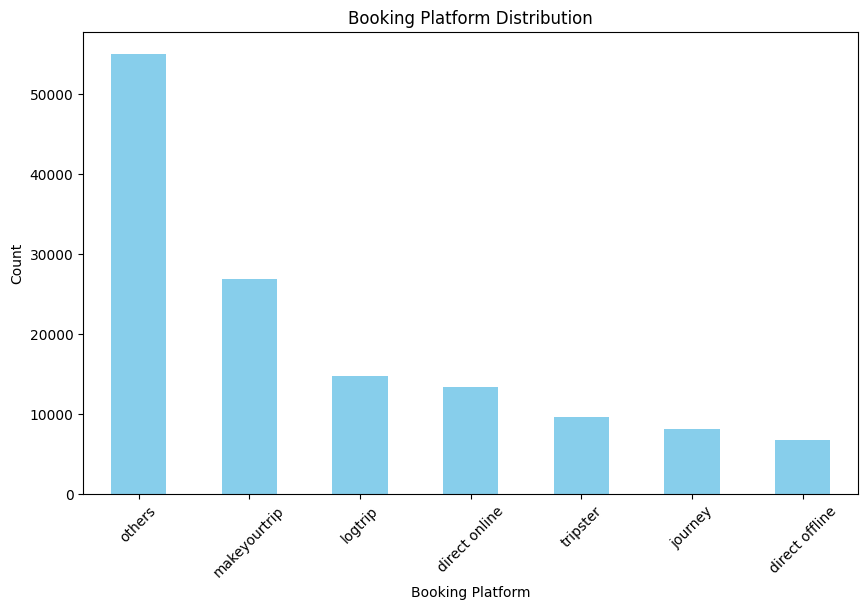

In [47]:
#48. create a bar chart of above booking platform numbers
value_counts = df_final.booking_platform.value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Booking Platform Distribution')
plt.xlabel('Booking Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [48]:
#49. how many “luxuries” and “business” hotels does it have?
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [49]:
#50. how many hotels are there in different city? show in ascending order
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [50]:
#51. Find out unique property ids
df_final.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564])

In [51]:
#52. Find out total bookings per property_id
df_final.groupby("property_id")["booking_id"].count()

property_id
16558    3149
16559    7337
16560    4693
16561    4418
16562    4818
16563    7147
17558    5036
17559    6141
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: booking_id, dtype: int64

In [52]:
#53. Print revenue realized per city
df_final.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294418138
Hyderabad    325232870
Mumbai       668608011
Name: revenue_realized, dtype: int64

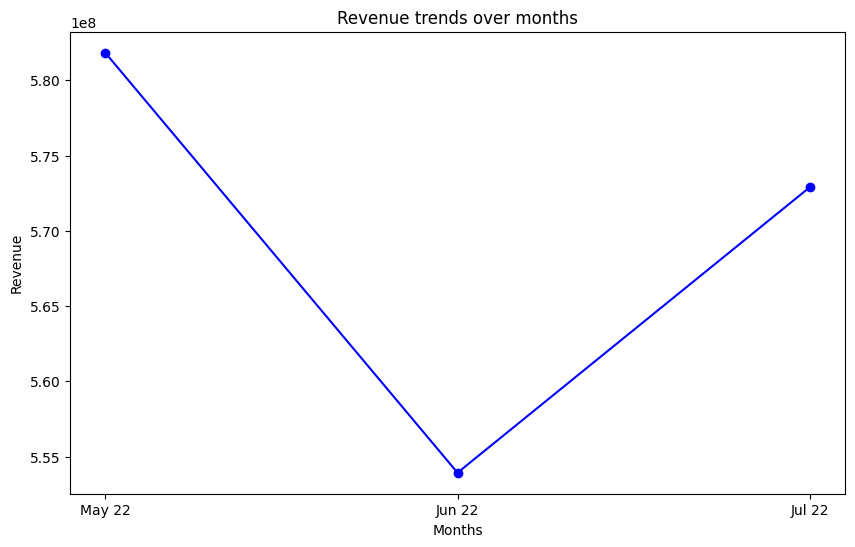

In [53]:
#54. print Revenue trends over months
monthly_trends=df_final.groupby("mmm yy")["revenue_realized"].sum().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-', color='blue')  # Use index for x-axis
plt.title('Revenue trends over months')
plt.xlabel("Months")
plt.ylabel("Revenue") 
plt.show()

In [54]:
#55. Top performing properties in terms of revenue
df_final.groupby("property_name")["revenue_realized"].sum().sort_values(ascending=False)

property_name
Atliq Exotica    320279488
Atliq Palace     304081863
Atliq City       285811939
Atliq Blu        260855522
Atliq Bay        260025978
Atliq Grands     211475784
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

In [55]:
#56. Print average rating per city
df_final.groupby("city")["ratings_given"].mean().sort_values(ascending=False)

city
Delhi        3.779027
Hyderabad    3.661132
Mumbai       3.650455
Bangalore    3.407681
Name: ratings_given, dtype: float64

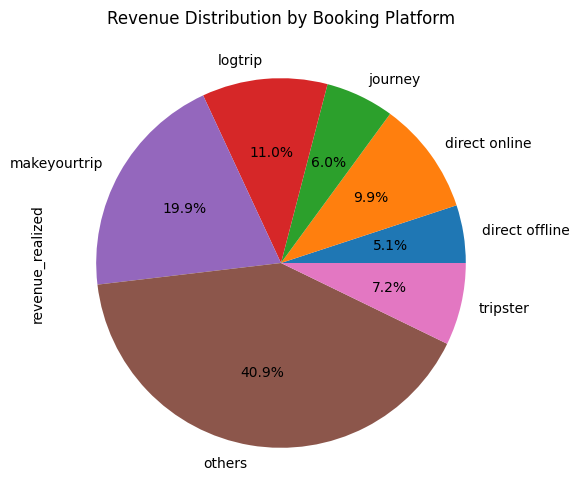

In [56]:
#57. Print a pie chart of revenue realized per booking platform
revenue_from_platform = df_final.groupby("booking_platform")["revenue_realized"].sum()
plt.figure(figsize=(10, 6))
revenue_from_platform.plot(kind="pie",autopct="%0.1f%%")
plt.title('Revenue Distribution by Booking Platform')
plt.show()

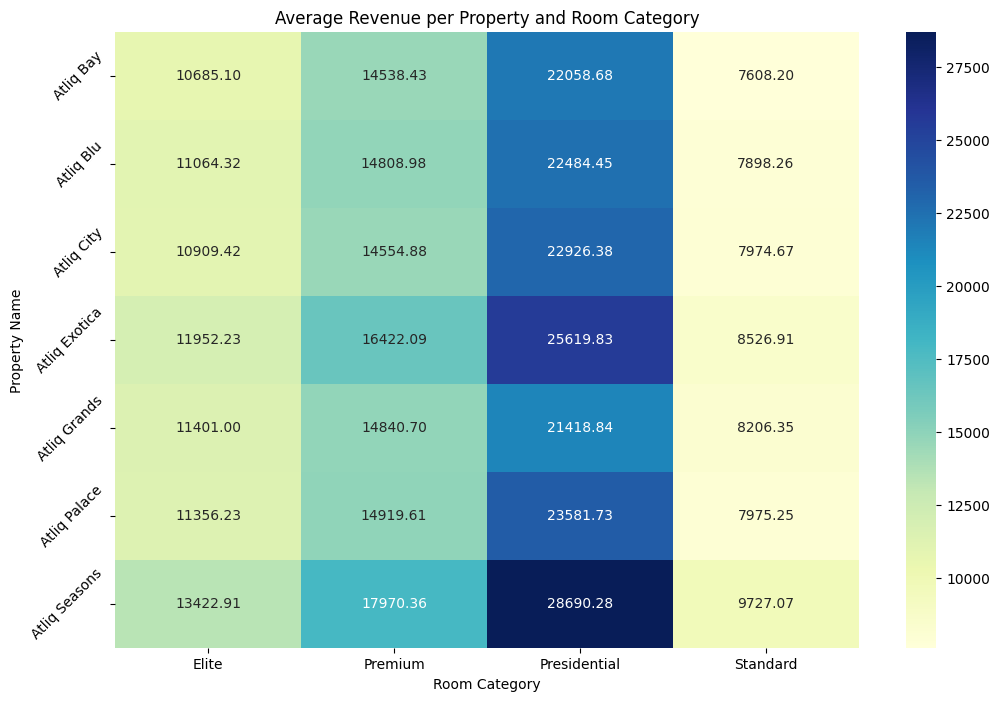

In [57]:
#58. create a heatmap showing average revenue per property and room class.
avg_revenue = df_final.groupby(['property_name', 'room_class'])['revenue_realized'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_revenue, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Revenue per Property and Room Category')
plt.xlabel('Room Category')
plt.ylabel('Property Name')
plt.yticks(rotation=45)
plt.show()

In [58]:
#58. When was the revenue better? weekday or weekend?
df_final.groupby("day_type")["revenue_realized"].sum()

day_type
weekeday    1069691182
weekend      638964887
Name: revenue_realized, dtype: int64

**Now load df_agg_booking data**

In [59]:
#59. read and load df_agg_booking
df_agg_bookings=pd.read_csv("fact_aggregated_bookings.csv")
print(df_agg_bookings.shape)
print(df_agg_bookings.info())
df_agg_bookings.head()

(9200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB
None


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


1.Here succesfful_bookings are greater than capacity. It is an error.
2. check-in-date Dtype is not correct
3. capacity column has two null values

In [60]:
#60. check capaicty column null values
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [61]:
#61. fill null values with median
df_agg_bookings.capacity=df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median())

In [62]:
#62. Verify
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [63]:
#63. check rows where successful booking is greater than capacity
print(df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity].shape)
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

(6, 5)


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [64]:
#64. delete these rows
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

In [65]:
#65. check info
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 431.0+ KB


check_in_date format needs to be changed

In [66]:
#66. format check-in-date
df_agg_bookings['check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'], format="mixed", dayfirst=True)
print(df_agg_bookings.shape)
df_agg_bookings.head()

(9194, 5)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
4,16558,2022-05-01,RT1,18,19.0
5,17560,2022-05-01,RT1,28,40.0


In [67]:
#67. check duplicated
print(df_agg_bookings.duplicated().sum())

0


**Create a new column Occupancy rate (OCC)**

In [68]:
#68. create a new column
df_agg_bookings["OCC%"]=df_agg_bookings.successful_bookings/df_agg_bookings.capacity
print(df_agg_bookings.shape)
df_agg_bookings.head()

(9194, 6)


,property_id,check_in_date,room_category,successful_bookings,capacity,OCC%
0,16559,2022-05-01,RT1,25,30.0,0.833333
1,19562,2022-05-01,RT1,28,30.0,0.933333
2,19563,2022-05-01,RT1,23,30.0,0.766667
4,16558,2022-05-01,RT1,18,19.0,0.947368
5,17560,2022-05-01,RT1,28,40.0,0.700000


In [69]:
#69. make it round and percentage
df_agg_bookings["OCC%"]=df_agg_bookings["OCC%"].apply(lambda x: round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC%
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
4,16558,2022-05-01,RT1,18,19.0,94.74
5,17560,2022-05-01,RT1,28,40.0,70.00


**merge df_rooms, df_hotels, and df_date**

In [70]:
#70. merge df_room and df_agg_bookings
df_agg_bookings=pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id", how="left")
#71. merge df_hotel and df_agg_bookings
df_agg_bookings=pd.merge(df_agg_bookings,df_hotels,on="property_id", how="left")
#72. merge df_date and df_agg_bookings
df_agg_bookings=pd.merge(df_agg_bookings,df_date,left_on="check_in_date", right_on="date", how="left")
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,OCC%,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,17560,2022-05-01,RT1,28,40.0,70.00,RT1,Standard,Atliq City,Business,Mumbai,2022-05-01,May 22,W 19,weekend


In [71]:
#73 drop unnecessary columns
df_agg_bookings.drop("date",axis=1,inplace=True)
df_agg_bookings.drop("room_id",axis=1,inplace=True)
print(df_agg_bookings.shape)
df_agg_bookings.head()

(9194, 13)


,property_id,check_in_date,room_category,successful_bookings,capacity,OCC%,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,May 22,W 19,weekend
3,16558,2022-05-01,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,May 22,W 19,weekend
4,17560,2022-05-01,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai,May 22,W 19,weekend


**Let's get some insights**

In [72]:
#74. What is the average occupancy rate in each of the room class?
df_agg_bookings.groupby("room_class")["OCC%"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: OCC%, dtype: float64

In [73]:
#75. Print average occupancy rate per city
df_agg_bookings.groupby("city")["OCC%"].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: OCC%, dtype: float64

In [74]:
#76. In the month of july, what is the occupancy for different cities?
df_july=df_agg_bookings[df_agg_bookings["mmm yy"]=="Jul 22"]
df_july.groupby("city")["OCC%"].mean().round(2)

city
Bangalore    56.04
Delhi        61.25
Hyderabad    57.64
Mumbai       57.50
Name: OCC%, dtype: float64

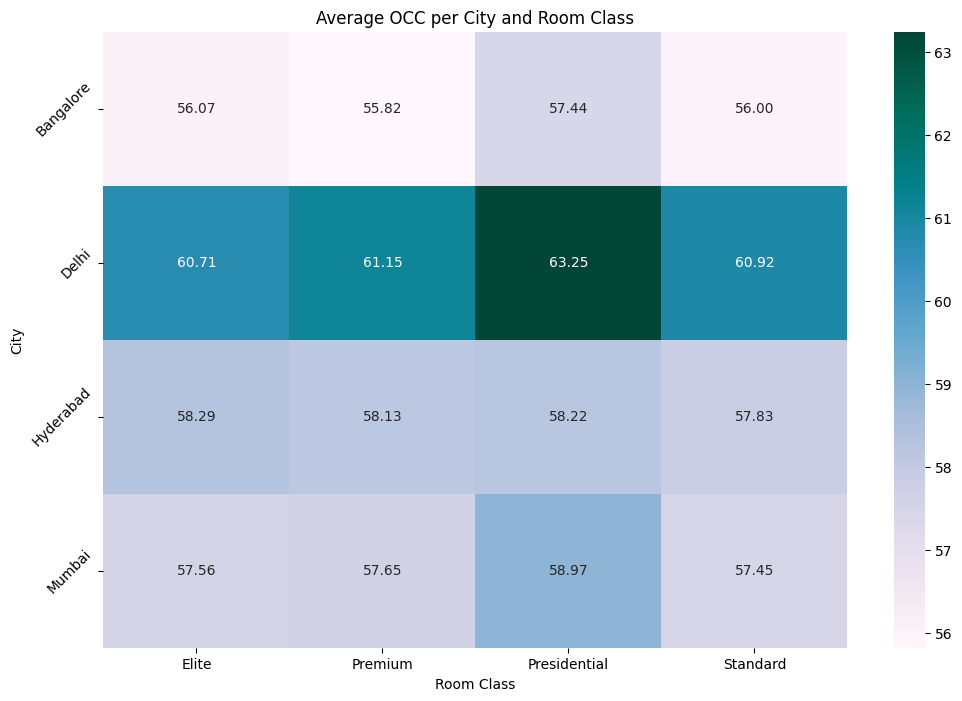

In [75]:
#77. create a heatmap showing average occupancy rate by city and room class.
avg_occ = df_agg_bookings.groupby(['city', 'room_class'])['OCC%'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_occ, annot=True, fmt=".2f", cmap="PuBuGn")
plt.title('Average OCC per City and Room Class')
plt.xlabel('Room Class')
plt.ylabel('City')
plt.yticks(rotation=45)
plt.show()

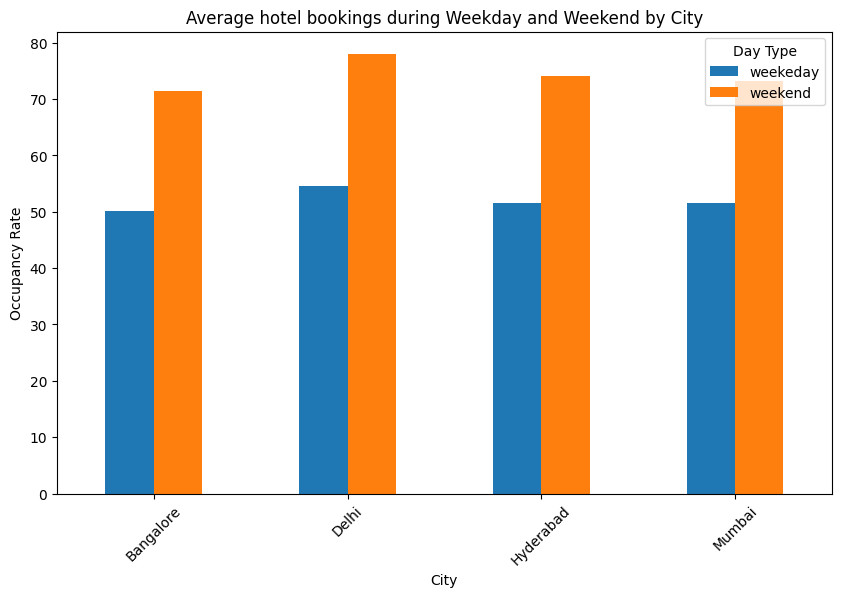

In [76]:
#78. weekday vs. weekend average occupancies in each city.
grouped_df = df_agg_bookings.groupby(['city', 'day_type'])['OCC%'].mean().unstack()
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average hotel bookings during Weekday and Weekend by City')
plt.xlabel('City')
plt.ylabel('Occupancy Rate')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.show()